In [191]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [192]:
df = pd.read_csv("C:\\Users\\Suvha\\Downloads\\healthcare_dataset.csv\\healthcare_dataset.csv")

In [193]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [194]:
df.shape

(55500, 15)

In [195]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [196]:
df[['Medication']].value_counts()

Medication 
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='count', ylabel='Medication'>

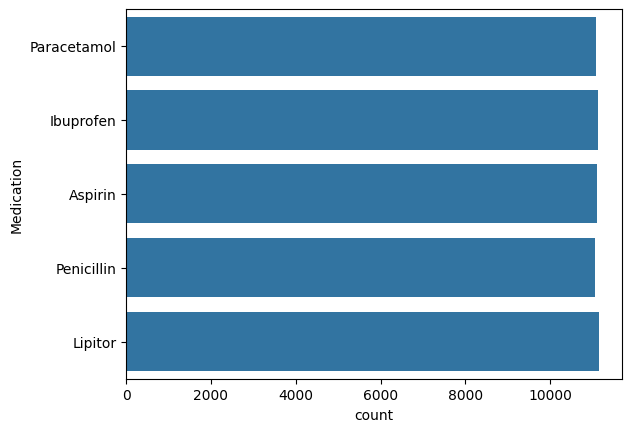

In [198]:
sns.countplot(df['Medication'])

<Axes: xlabel='Gender', ylabel='count'>

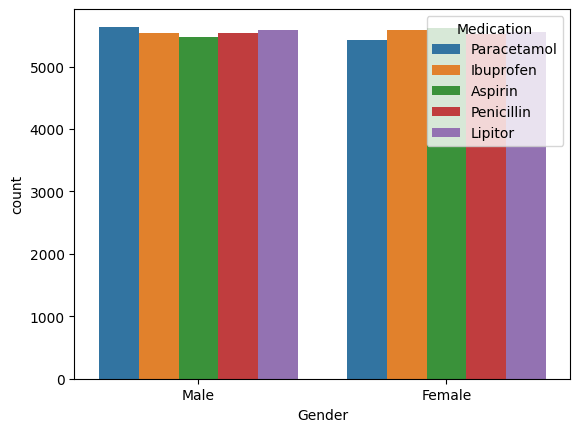

In [199]:
sns.countplot(x='Gender', hue='Medication', data=df)

<Axes: xlabel='Age', ylabel='count'>

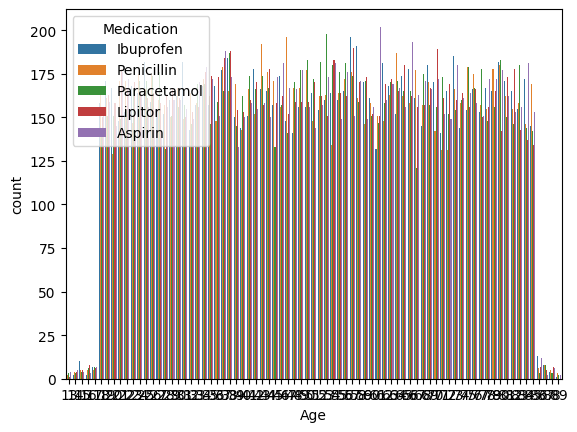

In [201]:
sns.countplot(x='Age', hue='Medication', data=df)

In [202]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [203]:
df.corr

<bound method DataFrame.corr of                     Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith           

In [204]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length_of_Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [205]:
df['Length_of_Stay']

0         2
1         6
2        15
3        30
4        20
         ..
55495    30
55496     9
55497    28
55498     6
55499    27
Name: Length_of_Stay, Length: 55500, dtype: int64

In [206]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,30
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,9
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,28
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,6


In [207]:
categorical_cols = ['Name','Gender','Date of Admission','Blood Type','Medical Condition','Doctor','Hospital','Insurance Provider','Admission Type','Medication','Test Results']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

features = ['Age','Billing Amount','Room Number','Discharge Date','Length_of_Stay'] + categorical_cols

In [208]:
features

['Age',
 'Billing Amount',
 'Room Number',
 'Discharge Date',
 'Length_of_Stay',
 'Name',
 'Gender',
 'Date of Admission',
 'Blood Type',
 'Medical Condition',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

In [209]:
X = df.drop(columns=['Medication', 'Name', 'Date of Admission', 'Discharge Date','Room Number'])
y = df['Medication']

In [210]:
X

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Test Results,Length_of_Stay
0,30,1,5,2,26612,29933,1,18856.281306,2,2,2
1,62,1,0,5,33648,16012,3,33643.327287,1,1,6
2,76,0,1,5,37828,5473,0,27955.096079,1,2,15
3,28,0,6,3,22511,12317,3,37909.782410,0,0,30
4,43,0,2,2,21259,33598,0,14238.317814,2,0,20
...,...,...,...,...,...,...,...,...,...,...,...
55495,42,0,6,1,20003,15553,1,2650.714952,0,0,30
55496,61,0,3,5,37149,31722,2,31457.797307,0,2,9
55497,38,0,4,4,18550,37408,4,27620.764717,2,0,28
55498,43,1,7,0,22665,14329,3,32451.092358,0,0,6


In [211]:
y

0        3
1        1
2        0
3        1
4        4
        ..
55495    4
55496    0
55497    1
55498    1
55499    1
Name: Medication, Length: 55500, dtype: int64

In [212]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [213]:
x

array([[-1.09882435,  0.99913551,  0.65834792, ...,  1.22267925,
         1.22479483, -1.56001783],
       [ 0.53363905,  0.99913551, -1.52536431, ...,  0.00173792,
         0.00242272, -1.09809858],
       [ 1.24784178, -1.00086524, -1.08862186, ...,  0.00173792,
         1.22479483, -0.05878027],
       ...,
       [-0.6907085 , -1.00086524,  0.22160548, ...,  1.22267925,
        -1.21994939,  1.4424573 ],
       [-0.43563609,  0.99913551,  1.53183282, ..., -1.21920342,
        -1.21994939, -1.09809858],
       [ 0.07450872, -1.00086524,  1.09509037, ...,  1.22267925,
        -1.21994939,  1.32697749]], shape=(55500, 11))

In [214]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [215]:
X_test

array([[ 0.27856664,  0.99913551,  1.09509037, ..., -1.21920342,
         0.00242272,  0.17217936],
       [-0.02752024, -1.00086524, -1.52536431, ...,  0.00173792,
        -1.21994939, -0.98261877],
       [-1.60896916,  0.99913551, -1.52536431, ..., -1.21920342,
         0.00242272,  1.55793712],
       ...,
       [ 1.14581282, -1.00086524,  0.22160548, ...,  0.00173792,
         1.22479483,  0.28765917],
       [ 0.17653768, -1.00086524, -0.21513697, ..., -1.21920342,
        -1.21994939, -0.28973989],
       [ 0.53363905, -1.00086524, -0.21513697, ...,  1.22267925,
         1.22479483, -0.75165914]], shape=(11100, 11))

In [216]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [217]:
clf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [222]:
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [223]:
y_pred = clf.predict(X_test)

In [224]:
from sklearn.metrics import accuracy_score

In [221]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.32594594594594595


In [227]:
from tensorflow.keras import layers, models


In [228]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

In [231]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

In [232]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [237]:

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=300)

Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2638 - loss: 1.5821 - val_accuracy: 0.2109 - val_loss: 1.6177
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2676 - loss: 1.5806 - val_accuracy: 0.2119 - val_loss: 1.6181
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2647 - loss: 1.5805 - val_accuracy: 0.2106 - val_loss: 1.6190
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2666 - loss: 1.5796 - val_accuracy: 0.2093 - val_loss: 1.6190
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2693 - loss: 1.5788 - val_accuracy: 0.2108 - val_loss: 1.6193
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2679 - loss: 1.5791 - val_accuracy: 0.2095 - val_loss: 1.6196
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2676 - loss: 1.5791 - val_accuracy: 0.2091 - val_loss: 1.6194
Epoch 8/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2685 - loss: 1.5798 - val_a

In [236]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2152 - loss: 1.6166
Test accuracy: 0.2152252197265625
